In [ ]:
# Data visualization from 
## original source
## encoding of proposed network

In [1]:
import lib_data_operation as tfm_data
import lib_neural_network as tfm_NN

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tensorflow import keras
from tensorflow.keras.models import Model

In [3]:
# Loading required data
df_weight_signaling, df_weight_metabolic_signaling = tfm_data.def_load_weight_pathways()
df_paper_9437, df_paper_signaling, df_paper_metabolic_signaling = tfm_data.def_load_dataset(['cell_type']+list(df_weight_signaling.index.values)
                                                                                                , ['cell_type']+list(df_weight_metabolic_signaling.index.values))

IMPORTING WEIGHT(PATHWAYS) TABLE
df_weight_signaling shape           ,  (1646, 92)
df_weight_metabolic_signaling shape ,  (3922, 250)
IMPORTING DATASETS


/home/pgundogdu/.conda/envs/tgpu/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,2

df_paper_9437 shape          ,  (402, 9438)
df_signaling shape           ,  (402, 1647)
df_metabolic_signaling shape ,  (402, 3923)


In [4]:
# Standardization of data
print('Normalization signaling data')
df_scaler_ss_signaling = tfm_data.def_dataframe_normalize(df_paper_signaling, StandardScaler(), 'cell_type')
df_scaler_mms_signaling = tfm_data.def_dataframe_normalize(df_paper_signaling, MinMaxScaler(), 'cell_type')
print('Normalization metabolic and signaling data')
df_scaler_ss_metabolic_signaling = tfm_data.def_dataframe_normalize(df_paper_metabolic_signaling, StandardScaler(), 'cell_type')
df_scaler_mms_metabolic_signaling = tfm_data.def_dataframe_normalize(df_paper_metabolic_signaling, MinMaxScaler(), 'cell_type')

Normalization signaling data
Normalization metabolic and signaling data


In [5]:
# X and y split operation
df_X = df_scaler_ss_signaling.iloc[:, ~df_scaler_ss_signaling.columns.isin(['cell_type'])]
df_y = df_scaler_ss_signaling.iloc[:, df_scaler_ss_signaling.columns.isin(['cell_type'])]

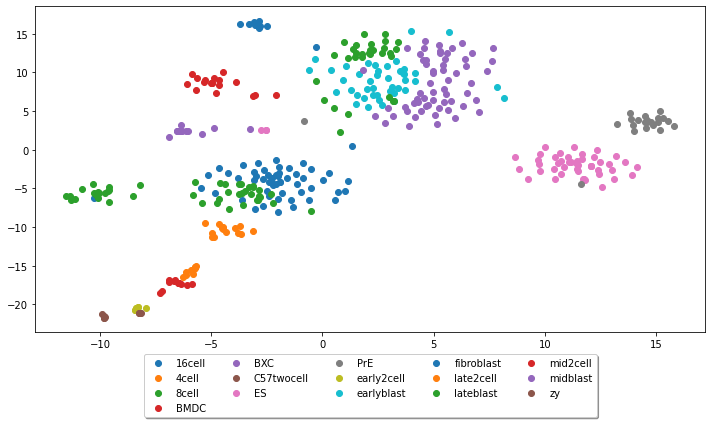

In [6]:
# TSNE representation of original dataset
df_tsne = pd.concat([pd.DataFrame(TSNE(n_components=2).fit_transform(df_X)), df_y], axis=1)
groups = df_tsne.groupby("cell_type")

fig, ax = plt.subplots(figsize=(12,6))
for name, group in groups:
    ax.scatter(group[0], group[1], label=name)

# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

In [13]:
# Loading required model
path_model = os.path.join(os.path.dirname(os.getcwd())+'/data/NN_result/models_epoch_100/cell_out_4/')
sorted(os.listdir(path_model))

model_loc = os.path.join(path_model+'/'+sorted(os.listdir(path_model))[1])
print(model_loc)

model_load = keras.models.load_model(model_loc)

# model.layers
model = Model(inputs=model_load.layers[0].input
                           #,  outputs=[l.output for l in basic_model.layers[1:]])
                           , outputs=model_load.layers[-2].output)
print(model.summary())

df_layer = pd.DataFrame(model.predict(df_X))

/home/pgundogdu/US_19/tfm_project/data/NN_result/models_epoch_100/cell_out_4//mms_a1_model_signaling
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1646)]            0         
_________________________________________________________________
layer1 (Dense)               (None, 92)                151524    
Total params: 151,524
Trainable params: 151,524
Non-trainable params: 0
_________________________________________________________________
None


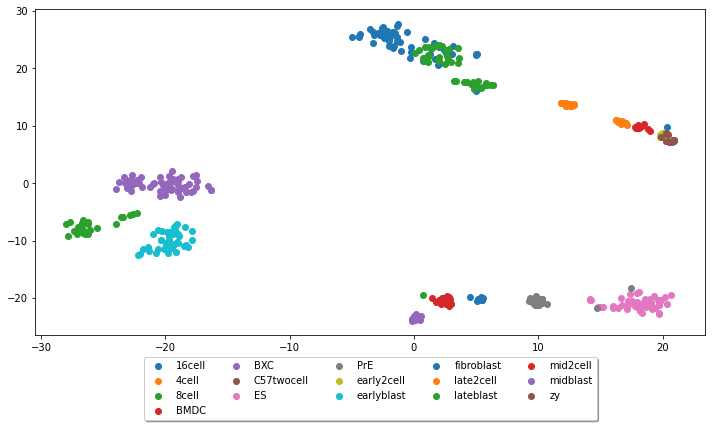

In [12]:
# TSNE representation of encoding information of proposed model for selected model
df_tsne = pd.concat([pd.DataFrame(TSNE(n_components=2).fit_transform(df_layer)), df_y], axis=1)
groups = df_tsne.groupby("cell_type")

fig, ax = plt.subplots(figsize=(12,6))
for name, group in groups:
    ax.scatter(group[0], group[1], label=name)

# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);